In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

color_pallet = sns.color_palette()
plt.style.use('fivethirtyeight')

In [8]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import warnings
import time
start_time = time.time()
warnings.filterwarnings('ignore')

train = pd.read_csv('E:\\clean2_data.csv')
# test = pd.read_csv('E:\\pre_daily.csv') #天
# test = pd.read_csv('E:\\pre_weekly.csv') #周
test = pd.read_csv('E:\\pre_monthly.csv')#月

In [9]:
df = pd.concat([train, test], sort=False)
print(df)

     order_date  sales_region_code  item_code  ord_qty
0      2015/9/2                101      20657       18
1      2015/9/2                102      20323      502
2      2015/9/2                102      20457      308
3      2015/9/2                102      21350      107
4      2015/9/3                102      20008       44
...         ...                ...        ...      ...
6556  2019/2/28                105      22083       74
6557  2019/3/31                105      22083       83
6558  2019/1/31                105      22084       28
6559  2019/2/28                105      22084       29
6560  2019/3/31                105      22084       36

[263599 rows x 4 columns]


In [10]:
df['order_date'] = pd.to_datetime(df['order_date'],)
# df['order_date'] = df['order_date'] - pd.to_timedelta(df['order_date'].dt.dayofweek, unit='d') #周
# df = df.groupby(['order_date'])['ord_qty'].sum().reset_index() #周
df['order_date'] = df['order_date'] - pd.to_timedelta(df['order_date'].dt.day-1, unit='d') #月
df = df.groupby(['order_date'])['ord_qty'].sum().reset_index() #月
# df = df.drop(['sales_region_code', 'item_code'], axis=1)
# df = df.groupby('order_date')['ord_qty'].sum() #天

df.set_index('order_date', inplace=True)
print(df)

            ord_qty
order_date         
2015-09-01   404234
2015-10-01   362771
2015-11-01   516032
2015-12-01   797657
2016-01-01   872002
2016-02-01   239582
2016-03-01   567202
2016-04-01   489000
2016-05-01   552842
2016-06-01   544742
2016-07-01   335995
2016-08-01   643188
2016-09-01   517876
2016-10-01   847730
2016-11-01   623522
2016-12-01   961299
2017-01-01   770408
2017-02-01   843440
2017-03-01  1357727
2017-04-01  1180582
2017-05-01  1214194
2017-06-01  1105457
2017-07-01   876280
2017-08-01  1275284
2017-09-01  1746581
2017-10-01  2131683
2017-11-01  1739363
2017-12-01  1534334
2018-01-01  2291675
2018-02-01   726942
2018-03-01  1809079
2018-04-01  1228181
2018-05-01  1392327
2018-06-01   715635
2018-07-01   812473
2018-08-01  1294088
2018-09-01  1659326
2018-10-01  2022459
2018-11-01  1856752
2018-12-01   949032
2019-01-01  1282979
2019-02-01  1412966
2019-03-01  1573277


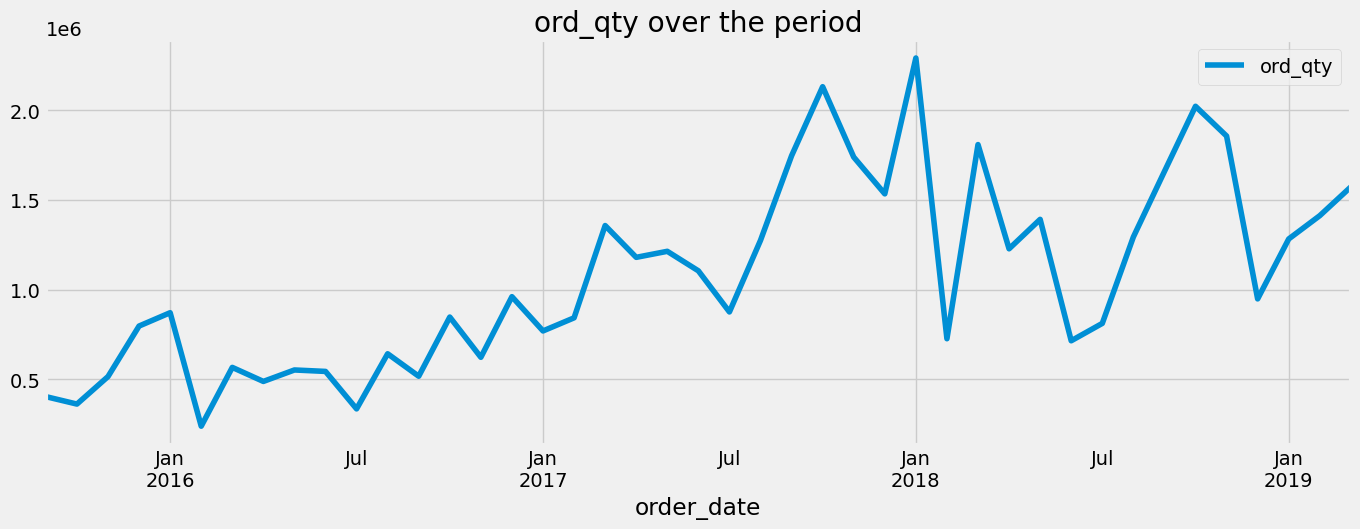

In [11]:
df.plot(figsize=(15, 5),
        color=color_pallet[0],
        title='ord_qty over the period')
plt.show()

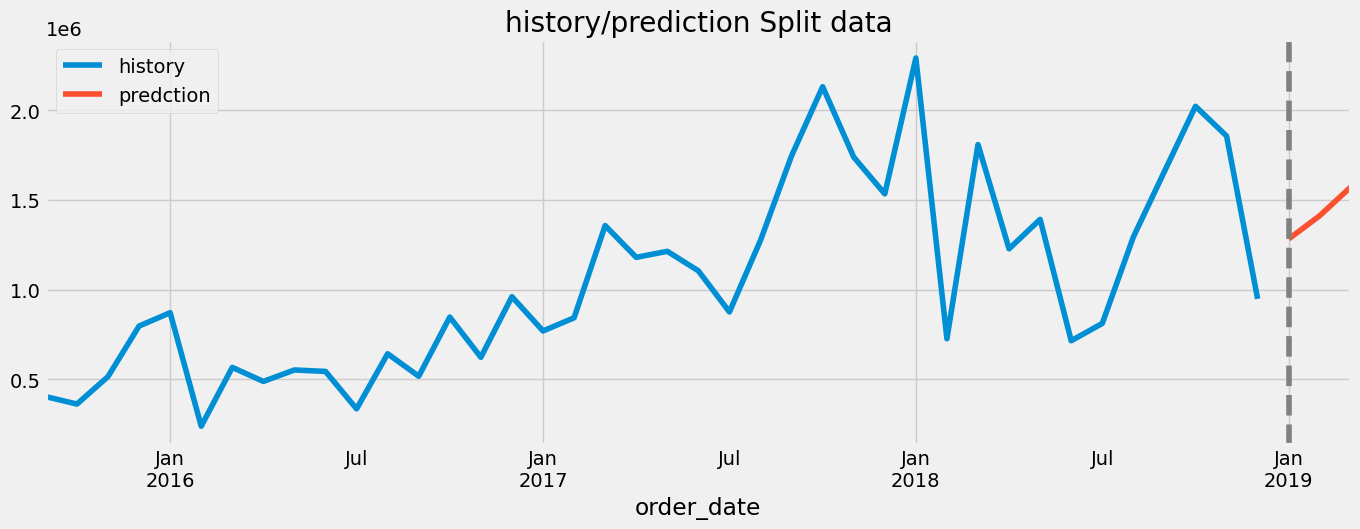

In [12]:
train = df.loc[df.index < '01-01-2019']
test = df.loc[df.index >= '01-01-2019']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='hisory', title='history/prediction Split data')
test.plot(ax=ax, label='prediction')
ax.axvline('01-01-2019', color='Gray', ls='--')
ax.legend(['history', 'predction'])
plt.show()